In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Get the training data

In [110]:
dfx=pd.read_csv("./datasets/Linear_X_Train.csv")
dfy=pd.read_csv("./datasets/Linear_Y_Train.csv")

In [111]:
x=dfx.values
y=dfy.values

In [112]:
print(x.shape,y.shape)

(3750, 1) (3750, 1)


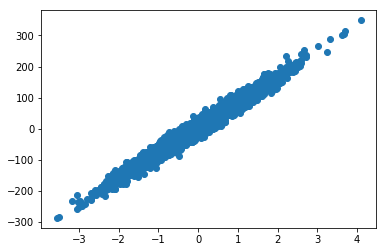

In [113]:
plt.scatter(x,y)
plt.show()

normalize the data 

In [114]:
X=(x-x.mean())/x.std()
Y=y

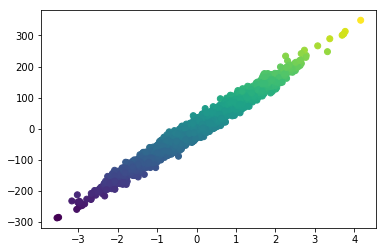

In [115]:
plt.scatter(X,Y,c=y)
plt.show()

Here we apply gradient descent algorithm which works well with linear data
 - start with random theta
 - repeat until converge 
 - update theta according to the update rule

Make a function which will help to calculate hypothesis  Y = Β0 + Β1X where Β0 is intercept(Bias) and Β1X is slope 

In [162]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

Make a function which will help to determine error between actual and predicted value

In [163]:
def error(X,Y,theta):
    m=X.shape[0]
    error=0
    for i in range(m):
        hx=hypothesis(x[i],theta)
        error+=(hx-Y[i])**2
    return error



Make a function which help you to calculate derivative with respect to B0 and B1 f(m,b)=1/N∑i=1n(yi−(mxi+b))2

In [164]:
def gradient(X,Y,theta):
    grad=np.zeros((2,))
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
    return grad

Make a function which will help to find out the local minima i.e final theta based upon given learning rate

In [169]:
def gradient_Descent(X,Y,learning_rate=0.0001):
    theta=np.zeros((2,))
    itr=0
    error_list=[]
    max_itr=70
   
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        itr+=1
    return theta,error_list
    

Now we will pass our data into function which will calculate local minima and error

In [170]:
final_theta,error_list=gradient_Descent(X,Y)

Visualization of error

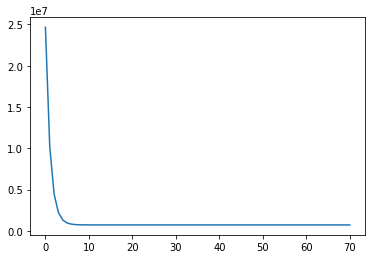

In [171]:
plt.plot(error_list)
plt.show()

Final theta i.e local minima

In [172]:
print(final_theta)

[ 3.72798828 80.54363185]


Generate some point which will fit on scatter points

In [182]:
xtest=np.linspace(-2,6,10)

In [183]:
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


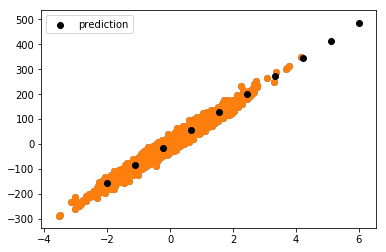

In [184]:
plt.scatter(X,Y)
plt.scatter(X,Y)
plt.scatter(xtest,hypothesis(xtest,final_theta),color="black",label="prediction")
plt.legend()
plt.show()

In [179]:
dfz=pd.read_csv('./datasets/Linear_X_Test.csv')
x_test=dfz.values
print(x_test)

[[-1.87794441]
 [-0.86903192]
 [-2.53018242]
 ...
 [ 0.12800782]
 [-0.27803759]
 [-0.68042543]]


In [180]:
y_test=hypothesis(x_test,final_theta)

In [181]:
print(y_test)

[[-147.52847525]
 [ -66.26699842]
 [-200.06209345]
 ...
 [  14.0382031 ]
 [ -18.66616899]
 [ -51.07594693]]


Make a csv file of prediction

In [191]:
y_test=pd.DataFrame(y_test,columns=["y"])
y_test.to_csv("samplesSubmission.csv",index=False)

In [192]:
x=pd.read_csv("samplesSubmission.csv")

In [193]:
x.head(n=5)

,y
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285
